In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
data = pd.read_csv('..\\data\\iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
data.shape

(150, 5)

In [26]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
data.dropna(axis=0,inplace=True)
data.replace(['setosa','versicolor','virginica'],[1,2,3],inplace=True)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [39]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']]
y = data[['species']]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
params_grid = {
    'n_neighbors':np.arange(1,20),
    'metric':['euclidean','manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(),params_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_score_

0.975

In [42]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=18)

### Confusion metrics

In [43]:
confusion_matrix(y_test,grid.predict(X_test))
# Avec le resultats on vois les erreurs de classement du modèles

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]], dtype=int64)

In [44]:
import seaborn as sns

<AxesSubplot:>

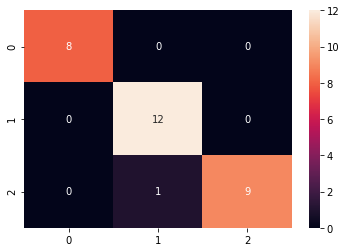

In [46]:
cmtx = confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(cmtx,annot=True)

In [47]:
accuracy_score(y_test,grid.predict(X_test))
# On remarque que 96% des données de test ont été correctement classer

0.9666666666666667

In [54]:
#Le rappel est le rapport tp / (tp + fn) où tp est le nombre de vrais positifs et fn le nombre de faux négatifs
#recall_score :: la capacité du classificateur à trouver tous les échantillons positifs
recall_score(y_test, grid.predict(X_test), average="weighted")

0.9666666666666667

In [57]:
#Calculez la précision La précision est le rapport tp / (tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux #positifs. La précision est intuitivement la capacité du classificateur à ne pas étiqueter comme positif un échantillon négatif.
precision_score(y_test, grid.predict(X_test), average="weighted")

0.9692307692307692

In [ ]:
#Calculez le score F1, également appelé score F équilibré ou mesure F Le score F1 peut être interprété comme une moyenne pondérée #de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. La contribution relative de #la précision et du rappel au score F1 est égale. La formule du score F1 est:F1 = 2 * (precision * recall) / (precision + recall)
f1_score(y_test, grid.predict(X_test), average='micro')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
y = titanic['survived']
X = titanic.drop('survived',axis=1)

## Pipeline

In [4]:
numerical_features = ['pclass','age','sibsp','parch','fare']
categorical_features = ['sex','class','adult_male','deck','embarked','embark_town','alone']

In [5]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [6]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())

In [7]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),(categorical_pipeline,categorical_features)) 
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['pclass', 'age', 'sibsp', 'parch', 'fare']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['sex', 'class', 'adult_male', 'deck',
                                  'embarked', 'embark_town', 'alone'])])

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [9]:
model = make_pipeline(preprocessor,LogisticRegression())
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8770949720670391


<AxesSubplot:>

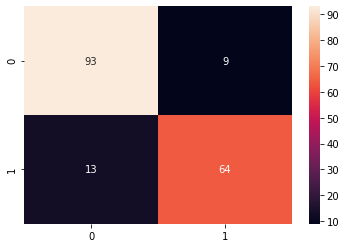

In [34]:
cmtx = confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cmtx,annot=True)

In [10]:
from sklearn.metrics import *

In [11]:
average_precision_score(y_test,model.predict(X_test))

0.8013216598966962

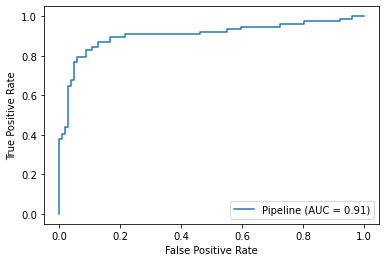

In [13]:
plot_roc_curve(model, X_test, y_test)
plt.show() 

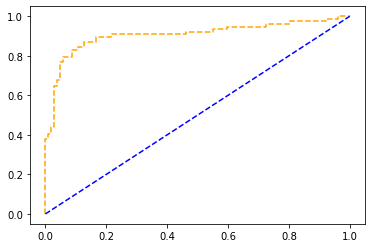

In [30]:
pred = model.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test,pred[:,1])
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

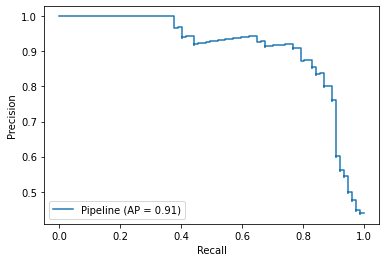

In [32]:
plot_precision_recall_curve(model, X_test, y_test)
plt.show()